### Importing dos dados

In [1]:
import pandas as pd

data = pd.read_csv("clustering_data.csv", sep=";")

### Visualização

Total de dados: 2297



,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


f1    True
f2    True
dtype: bool

Total de dados: 1703



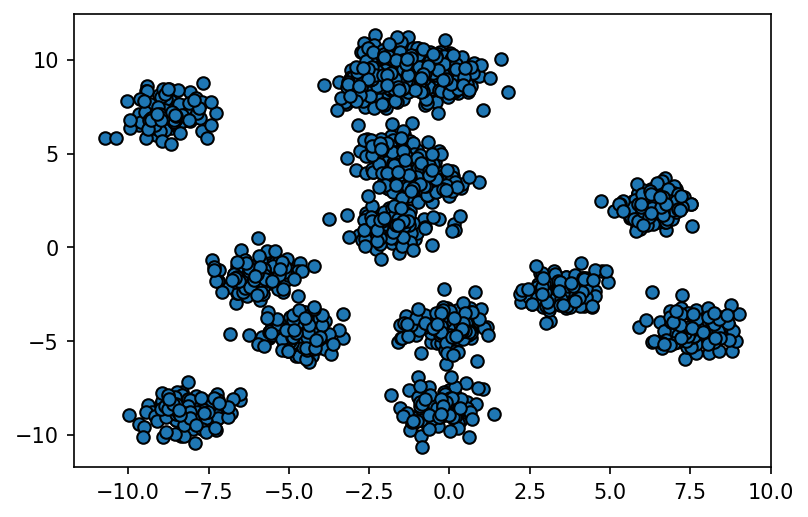

In [2]:
import matplotlib.pyplot as plt


print(f"Total de dados: {len(data)}\n")

display(data.head())
print("\n")
display(data.isna().any())
data = data.dropna()

print(f"Total de dados: {len(data)}\n")

plt.rcParams['figure.dpi'] = 150
plt.scatter(data["f1"], data["f2"], marker="o", edgecolor="black")
plt.show()

### Elbow Method

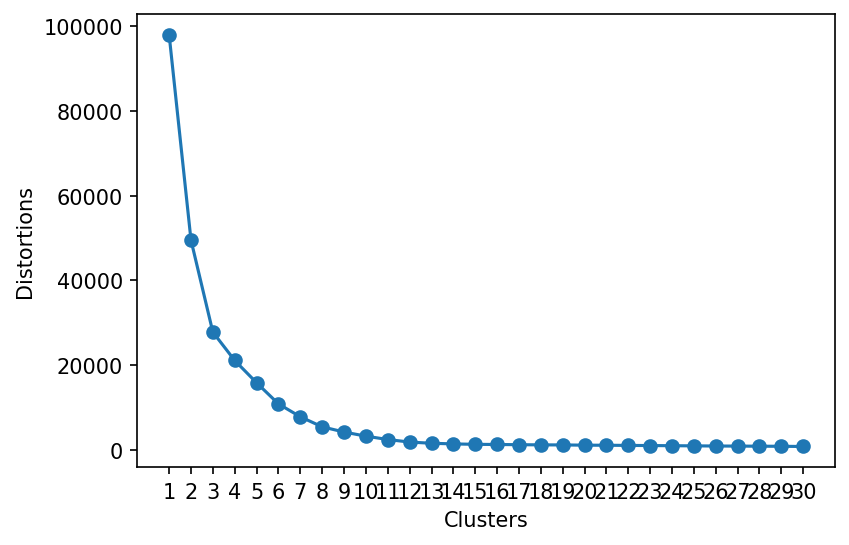

In [4]:
from sklearn.cluster import KMeans
import numpy as np

x = [[i["f1"], i["f2"]] for _, i in data.iterrows()]
x = np.array(x)

distortions = []
for i in range(1, 31):
    km = KMeans(n_clusters=i)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.xticks(range(1, 31))
plt.show()

### Criando o KMeans

In [5]:
modelo = KMeans(n_clusters=14)
modelo.fit(x)

KMeans(n_clusters=14)

### Visualizando

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

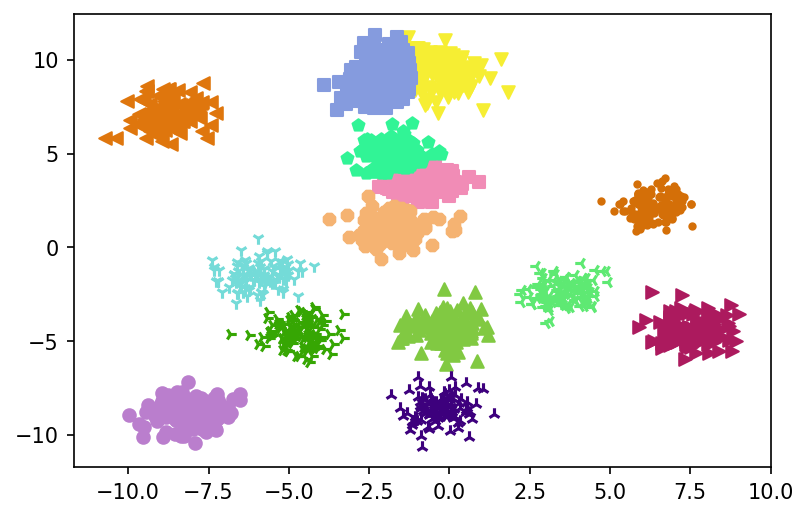

In [6]:
import numpy as np
from matplotlib.lines import Line2D

y_km = modelo.predict(x)
markers = list(Line2D.markers.keys())

for i in range(14):
    plt.scatter(x[y_km == i, 0], x[y_km == i, 1], c=np.random.rand(3,), marker=markers[i], label="grupo 1")

plt.show()

In [7]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
print('Calinski-Harabasz score: %.2f' % calinski_harabasz_score(x, modelo.labels_))
print('Silhouette score: %.2f' % silhouette_score(x, modelo.labels_))

Calinski-Harabasz score: 8944.68
Silhouette score: 0.61
